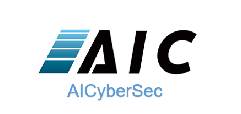

# DBSCAN Practice

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn import cluster
from sklearn.cluster import DBSCAN

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Fit DBSCAN on a generated dataset


We will start with a simple generated dataset. 

Import the `make_circles` function from `sklearn.datasets`. You can use this to generate some clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

### 1. Plot the generated circles data

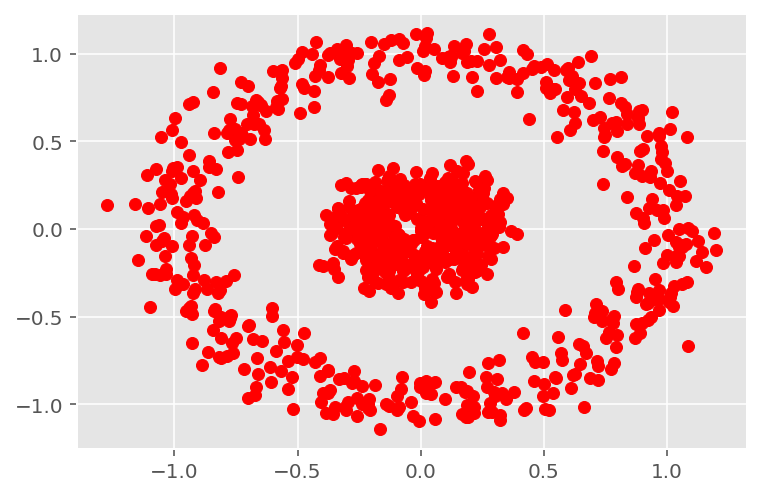

In [85]:
# Import the make_circles function from sklearn.datasets. You can use this to generate some clusters that 
# will perform well with DBSCAN

# Create some X and y using the function. Here is some sample code:

from sklearn.datasets import make_circles

circles_X, circles_y = make_circles(
    n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(circles_X[:, 0], circles_X[:, 1], c='r')
plt.show()

In [86]:
circles_X

array([[-0.08769568,  1.08597835],
       [-0.83755821,  0.54731034],
       [ 0.79684284,  0.41149548],
       ...,
       [ 0.28197613, -0.99058106],
       [-0.13945495, -0.99992483],
       [-0.06902609,  0.09488232]])

In [87]:
circles_y

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,

### 2. Rescale the data

In [88]:
scaler = StandardScaler()
X = scaler.fit_transform(circles_X)

In [89]:
X.shape

(1000, 2)

### 3. Fit DBSCAN on the rescaled data

In [90]:
dbscan = DBSCAN(eps=.5, min_samples=3)
dbscan.fit(X)

DBSCAN(min_samples=3)

### 4. Extract the cluster labels.

In [92]:
labels = dbscan.labels_
print(np.unique(labels))
print(len(labels), labels.sum())

[0 1]
1000 500


### 5. How many clusters do you get?

In [93]:
n_clusters_ = len(set(labels) - set([-1]))
print(n_clusters_)

2


### 6. Evaluate DBSCAN

- Visually
- With silhouette score
- Using the true `y`, with homogeneity, completeness and V-measure score

In [96]:
def cluster_score(X, y, labels):
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)

In [97]:
cluster_score(X, circles_y, labels)

Silhouette Coefficient: 0.238
Estimated number of clusters: 2


#  Create a DBSCAN data

In [109]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
X, y = make_blobs(n_samples=1000, centers=8,\
n_features=2, random_state=800)

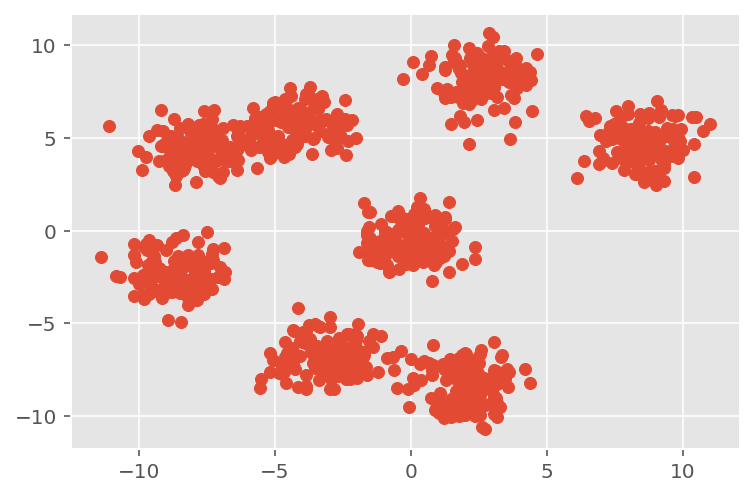

In [110]:
# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [111]:
db = DBSCAN(eps=0.7, min_samples=10, metric='euclidean')

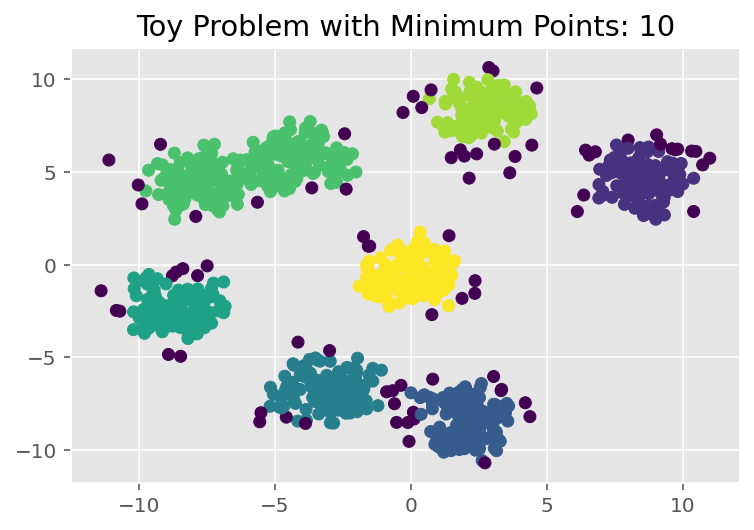

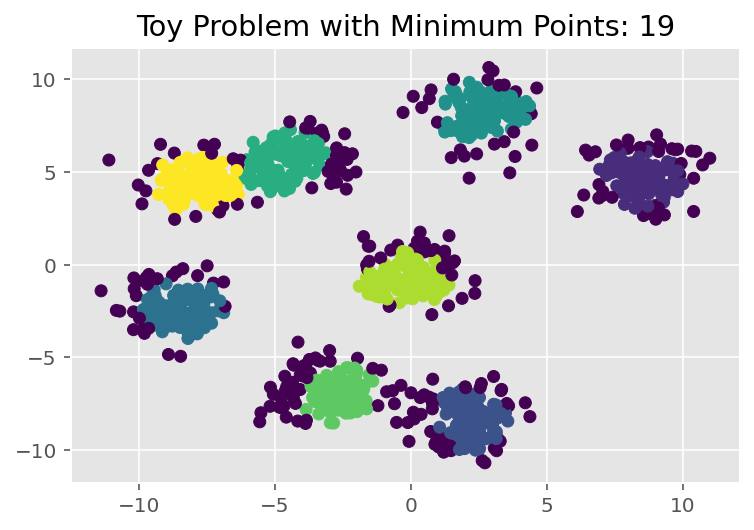

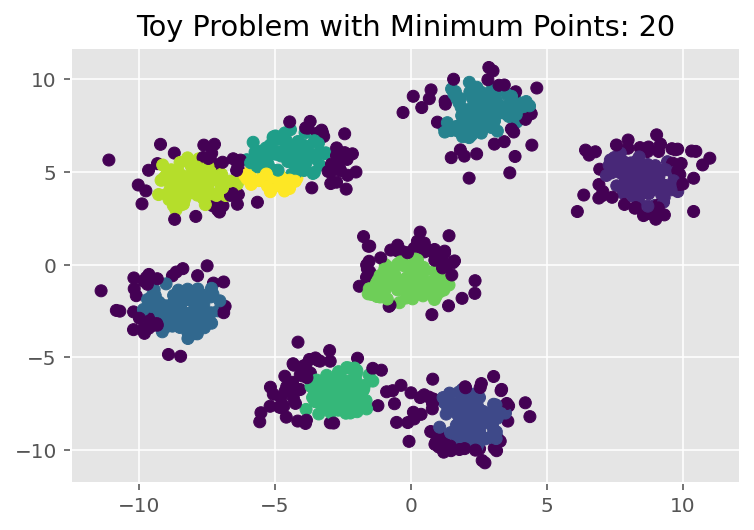

In [112]:
num_samples = [10,19,20]
for min_num in num_samples:
 db = DBSCAN(eps=0.7, min_samples=min_num, metric='euclidean')
 plt.scatter(X[:,0], X[:,1], c=db.fit_predict(X))
 plt.title('Toy Problem with Minimum Points: ' + str(min_num))
 plt.show()